# Case Study: Visualization of the activation functions

## Data set: Fraudulent bank transaction detection

### Description
The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Download of data files
https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv

### Additional references on the dataset
_The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project._

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Auxiliary functions

In [2]:
# Construction of a function that performs complete partitioning
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

## 1. Reading the data set

In [4]:
df = pd.read_csv(r"C:\Users\DT\Documents\NN\creditcard.csv")

## 2. Visualization of the data set

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


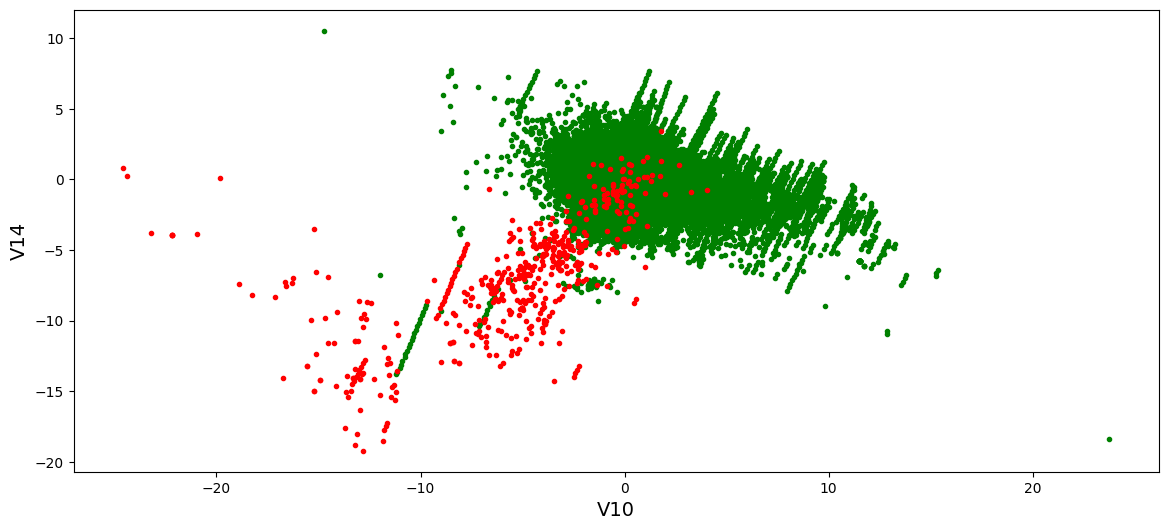

In [6]:
# Graphical representation of two characteristics
plt.figure(figsize=(14, 6))
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".") # no fraudelent
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".") # fraudelent
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

## 3. Division of the data set

In [7]:
# We divide the data set
train_set, val_set, test_set = train_val_test_split(df)

In [8]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

## 4. Activation functions

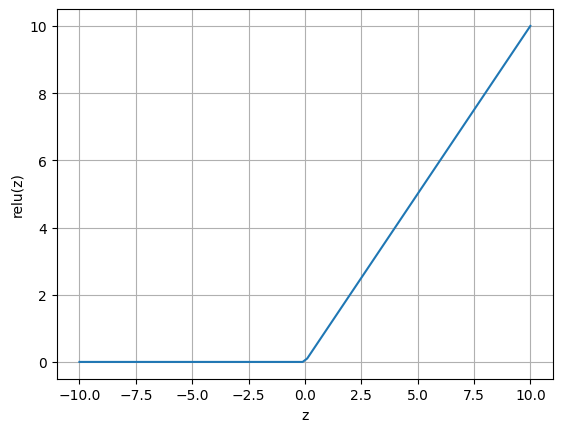

In [9]:
# Graphical representation of the relu function
from tensorflow.keras.backend import relu

z = np.linspace(-10, 10, 100)
plt.plot(z, relu(z))
plt.xlabel("z")
plt.ylabel("relu(z)")
plt.grid()
plt.show()

## 5. Artificial Neural Networks with a two-dimensional dataset

In [10]:
# We reduce the data set and are left with the input characteristics V10 and V14.
X_train_reduced = X_train[["V10", "V14"]].copy()
X_val_reduced = X_val[["V10", "V14"]].copy()
X_test_reduced = X_test[["V10", "V14"]].copy()

**Algorithm training with a reduced data set**.

In [11]:
# Definition of the neural network architecture
from tensorflow.keras import models
from tensorflow.keras import layers

activation = "relu"

model = models.Sequential()
model.add(layers.Dense(128, activation=activation, input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation=activation))
model.add(layers.Dense(32, activation=activation))
model.add(layers.Dense(16, activation=activation))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
# Summary of model layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy', 'Precision'])

In [14]:
# We train the model and calculate the runtime
import time
start_time = time.time()

history = model.fit(X_train_reduced,
                   y_train,
                   epochs=20,
                   validation_data=(X_val_reduced, y_val))

print("\n--- Execution time: {} seconds ---".format(time.time() - start_time))

Epoch 1/20


5341/5341 [==============================] - 11s 2ms/step - loss: 0.0231 - accuracy: 0.9984 - precision: 0.7609 - val_loss: 0.0047 - val_accuracy: 0.9988 - val_precision: 0.8636
Epoch 2/20
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0045 - accuracy: 0.9991 - precision: 0.8564 - val_loss: 0.0039 - val_accuracy: 0.9992 - val_precision: 0.8696
Epoch 3/20
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0042 - accuracy: 0.9992 - precision: 0.8478 - val_loss: 0.0037 - val_accuracy: 0.9993 - val_precision: 0.8831
Epoch 4/20
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8523 - val_loss: 0.0038 - val_accuracy: 0.9994 - val_precision: 0.8523
Epoch 5/20
5341/5341 [==============================] - 13s 2ms/step - loss: 0.0040 - accuracy: 0.9992 - precision: 0.8207 - val_loss: 0.0036 - val_accuracy: 0.9993 - val_precision: 0.8831
Epoch 6/20
5341/5341 [==============================]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predicciones sobre TEST
y_pred_proba = model.predict(X_test_reduced)

# BINARIO
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Test Accuracy :", accuracy)
print("Test Precision:", precision)

1781/1781 [==============================] - 2s 896us/step
Test Accuracy : 0.999420666409185
Test Precision: 0.8658536585365854


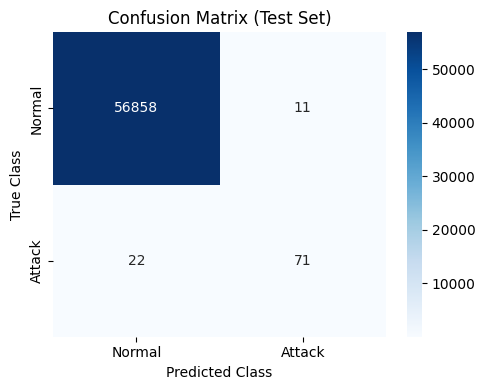

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Normal', 'Attack']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix (Test Set)")
plt.tight_layout()
plt.show()

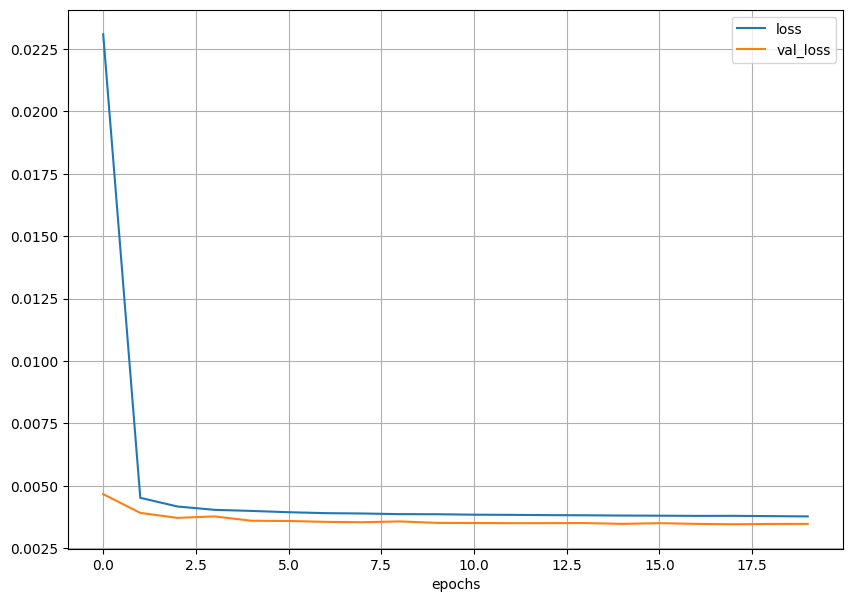

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame({'loss': history.history['loss'], 
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()